## STATS 306 WI 2020, HW 3, _25 points_

Assigned: 03/06/2020

Due: 03/20/2020 at 11:59:59 pm (no credit for late submissions)

In [107]:
options(repr.plot.width=6, repr.plot.height=4)


In [114]:
install.packages("tidyr")
library(tidyverse)
library(nycflights13)


also installing the dependencies ‘rlang’, ‘ellipsis’, ‘dplyr’, ‘vctrs’, ‘lifecycle’

Warning message in install.packages("tidyr"):
“installation of package ‘rlang’ had non-zero exit status”Warning message in install.packages("tidyr"):
“installation of package ‘ellipsis’ had non-zero exit status”Warning message in install.packages("tidyr"):
“installation of package ‘lifecycle’ had non-zero exit status”Warning message in install.packages("tidyr"):
“installation of package ‘dplyr’ had non-zero exit status”Warning message in install.packages("tidyr"):
“installation of package ‘vctrs’ had non-zero exit status”Warning message in install.packages("tidyr"):
“installation of package ‘tidyr’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [122]:
library(tidyr)
library(dplyr)

### Problem 1, _7 points_

**(1)** Alice wants to compute the mean departure delay (`dep_delay`) of flights grouped by destination airport (`dest`). She types:

```
flights %>%
    group_by(dest) %>%
    summarize(delay = mean(dep_delay))
```

But most of the values in the `delay` column of the computed tibble are `NA`. Explain, as briefly as possible, what is going on?, _1 point_

This code calculates the mean dep_delay for each airport, but if there is a "NA" value for any of the dep_delay entries, then the returned mean becomes "NA" as well. Therefore na.rm needs to be done to the dep_delay column before calculating the mean to solve this issue.

**(2)** Modify Alice's code so that the code doesn't return a tibble with mostly `NA` for the `delay` column. _2 points_

In [115]:
flights %>%
    group_by(dest) %>%
    summarize(delay = mean(dep_delay,na.rm=TRUE))

dest,delay
ABQ,13.740157
ACK,6.456604
ALB,23.620525
ANC,12.875000
ATL,12.509824
AUS,13.025641
AVL,8.190114
BDL,17.720874
BGR,19.475000
BHM,29.694853


**(3)** Building on your code from above, add a column named `count` in the summarized tibble that has the count of the number of flights flying to each destination airport. Then sort the rows in increasing order of `delay`. Use a single command involving pipes to accomplish both tasks. _2 points_ 

In [49]:
flights %>%
    group_by(dest) %>%
    summarize(delay = mean(dep_delay,na.rm=TRUE),count=n()) %>%
    arrange(delay)

dest,delay,count
LEX,-9.000000,1
PSP,-2.944444,19
EYW,3.647059,17
STT,4.613900,522
ACK,6.456604,265
XNA,6.464886,1036
MVY,7.051643,221
SRQ,7.256027,1211
SNA,7.761905,825
AVL,8.190114,275


**(4)** Which airport has the least average delay? How many flights is this conclusion drawn from? Is it a reliable conclusion? _2 points_

LEX has the least average delay with -9. This value is drawn from 1 flight, and therefore is not a reliable conclusion because the sample size is one flight. 

### Problem 2, _8 points_

**(1)** Write the command to create a histogram showing the distribution of `air_time` using the `flights` tibble. Use a binwidth of 20 minutes. _2 points_

Warning message:
“Removed 9430 rows containing non-finite values (stat_bin).”

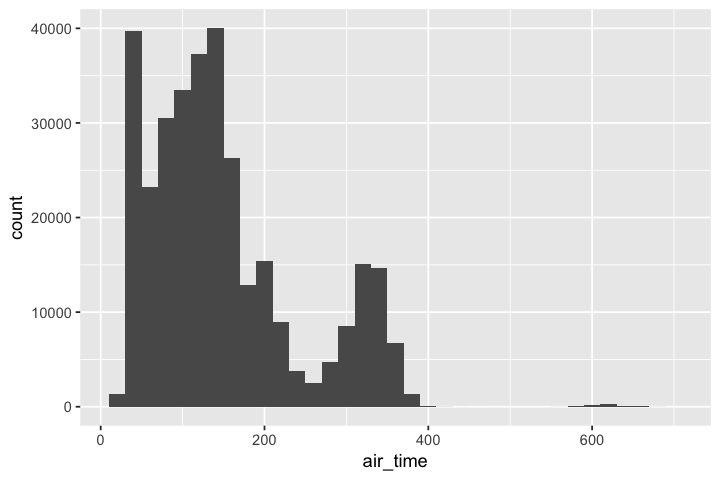

In [116]:
ggplot(data = flights) +
    geom_histogram(mapping = aes(x = air_time), binwidth = 20)

**(2)** Do you see any outliers at around 10 hours? Use a filter command to return only the outliers. Which airport are all these outlier flights flying to? _2 points_

In [117]:
flights %>%
    filter(air_time>500)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,857,900,-3,1516,1530,-14,HA,51,N380HA,JFK,HNL,659,4983,9,0,2013-01-01 09:00:00
2013,1,1,1344,1344,0,2005,1944,21,UA,15,N76065,EWR,HNL,656,4963,13,44,2013-01-01 13:00:00
2013,1,2,909,900,9,1525,1530,-5,HA,51,N380HA,JFK,HNL,638,4983,9,0,2013-01-02 09:00:00
2013,1,2,1344,1344,0,1940,1944,-4,UA,15,N77066,EWR,HNL,634,4963,13,44,2013-01-02 13:00:00
2013,1,3,914,900,14,1504,1530,-26,HA,51,N380HA,JFK,HNL,616,4983,9,0,2013-01-03 09:00:00
2013,1,3,1418,1341,37,2006,1935,31,UA,15,N76064,EWR,HNL,628,4963,13,41,2013-01-03 13:00:00
2013,1,4,900,900,0,1516,1530,-14,HA,51,N384HA,JFK,HNL,639,4983,9,0,2013-01-04 09:00:00
2013,1,4,1343,1341,2,1932,1935,-3,UA,15,N76065,EWR,HNL,623,4963,13,41,2013-01-04 13:00:00
2013,1,5,858,900,-2,1519,1530,-11,HA,51,N381HA,JFK,HNL,635,4983,9,0,2013-01-05 09:00:00
2013,1,5,1329,1335,-6,1850,1935,-45,UA,15,N76065,EWR,HNL,600,4963,13,35,2013-01-05 13:00:00


These outliers are all flying to HNL. 

**(3)** Write the command to produce the following plot using the `mpg` tibble: _4 points_
![hwy vs drv](https://github.com/ambujtewari/stats306-winter2020/raw/master/HW3/Rplot1.png)

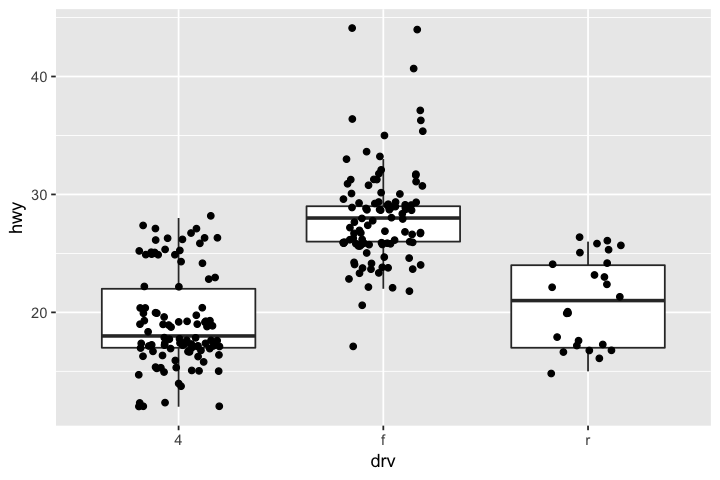

In [54]:
ggplot(data = mpg, mapping = aes(x = drv, y = hwy)) + 
    geom_boxplot(outlier.shape = NA) +
    geom_jitter(width = .2) 

### Problem 3, _5 points_

**(1)** Here's code that creates an annoying tibble:

In [80]:
annoying <- tibble(
  `1` = 1:10,
  `2` = `1` * 2 + rnorm(length(`1`))
)

It's annoying because it uses **non-syntactic** names for its two variables.

Write the command to extract the variable called `1`. _1 point_

In [81]:
 annoying$`1`

[1]  1  2  3  4  5  6  7  8  9 10

**(2)** Write the code to create a scatter plot with `1` on the x-axis and `2` on the y-axis. _2 points_

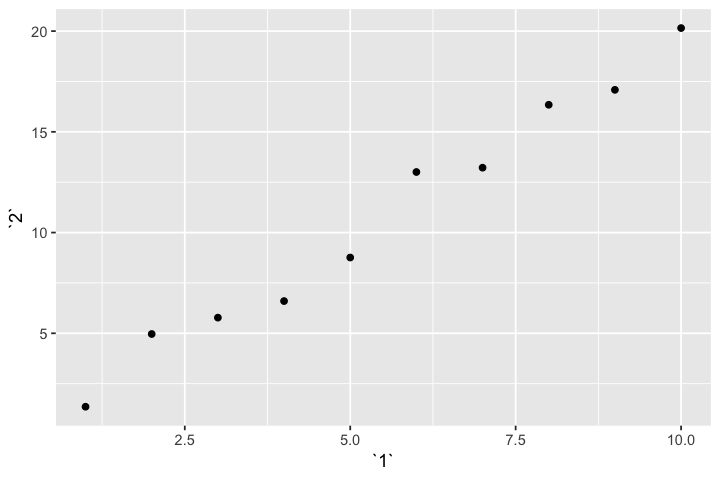

In [82]:
 ggplot(annoying, aes(x = `1`, y = `2`)) +
      geom_point()

**(3)** Write the code to create a new column called `3` which is `2` divided by `1`. _1 point_

In [83]:
annoying<-mutate(annoying,`3`=`2`/`1`)
print(annoying)

# A tibble: 10 x 3
     `1`   `2`   `3`
   <int> <dbl> <dbl>
 1     1  1.35  1.35
 2     2  4.96  2.48
 3     3  5.78  1.93
 4     4  6.60  1.65
 5     5  8.76  1.75
 6     6 13.0   2.17
 7     7 13.2   1.89
 8     8 16.3   2.04
 9     9 17.1   1.90
10    10 20.2   2.02


**(4)** Write the code to rename the columns to `one`, `two` and `three`. _1 point_

In [84]:
annoying=rename(annoying, one = `1`, two = `2`, three = `3`)
    print(annoying)

# A tibble: 10 x 3
     one   two three
   <int> <dbl> <dbl>
 1     1  1.35  1.35
 2     2  4.96  2.48
 3     3  5.78  1.93
 4     4  6.60  1.65
 5     5  8.76  1.75
 6     6 13.0   2.17
 7     7 13.2   1.89
 8     8 16.3   2.04
 9     9 17.1   1.90
10    10 20.2   2.02


### Problem 4, _5 points_

**(1)** Use the `tribble` command to create a tibble called `salaries` that would print as follows: _2 points_

```
# A tibble: 3 x 3
  name    `2018` `2019`
  <chr>    <dbl>  <dbl>
1 Alice    60000  80000
2 Bob      55000  60000
3 Charlie  65000  70000
```

In [119]:
salaries<-tribble(
    ~name, ~`2018`, ~`2019`, 
    #--|---|---
    "Alice", 60000, 80000,
    "Bob", 55000, 60000,
    "Charlie", 65000, 70000,
)
print(salaries)

# A tibble: 3 x 3
  name    `2018` `2019`
  <chr>    <dbl>  <dbl>
1 Alice    60000  80000
2 Bob      55000  60000
3 Charlie  65000  70000


**(2)** Write a command using the `pivot_longer()` function to convert `salaries` to `salaries_tidy` that would print as follows: _1 point_

```
# A tibble: 6 x 3
  name    year  salary
  <chr>   <chr>  <dbl>
1 Alice   2018   60000
2 Alice   2019   80000
3 Bob     2018   55000
4 Bob     2019   60000
5 Charlie 2018   65000
6 Charlie 2019   70000
```

In [123]:
(salaries_tidy <- pivot_longer(salaries, c(`2018`, `2019`), names_to = "year", values_to = "salary"))
print(salaries_tidy)

ERROR: Error in pivot_longer(salaries, c(`2018`, `2019`), names_to = "year", : could not find function "pivot_longer"


In [125]:
packageVersion('tidyr')

ERROR: Error in packageVersion("tidyr"): there is no package called ‘tidyr’


Write a command using the `pivot_longer()` function to convert `salaries` to `salaries_tidy2` that would print as follows: _2 points_

```
# A tibble: 6 x 3
  name    year  salary
  <chr>   <chr>  <int>
1 Alice   2018   60000
2 Alice   2019   80000
3 Bob     2018   55000
4 Bob     2019   60000
5 Charlie 2018   65000
6 Charlie 2019   70000
```

_Hint_: Observe the _types_ of the columns carefully.